In [2]:
import numpy as np
import networkx as nx
import random
from scipy.stats import norm, pearsonr
from math import log, e
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# Evolving Networks

## $t$-party

In the $t$-party gender play no role, hence each newcomer is allowed to invite only one other participants to a dance. However, attractiveness plays a role: More attractive participants are more likely to be invited to a dance by a new participant. The party evolves following these rules:
 - Every participant corresponds to a node $i$ and is assigned a time-independent attractiveness coefficient $n_i$.
 - At each time step a new node joins the $t$-party.
 - This new node then invites one already partying node to a dance, establishing a new link with it.
 - The new node chooses its dance partner with probability proportional to the potential partner's attractiveness. If there are t nodes already in the party, the probability that node $i$ receives a dance invitation is 
 $$
 \Pi_i = \dfrac{n_i}{t \langle n \rangle}
 $$
 where $ \langle n \rangle$ is the average attractiveness.

In [6]:
def probability(G):
    # Helper function for creating a probability distribution.

    lst = np.array([x[1]['fitness'] for x in G.nodes().data()])
    lst = lst / np.sum(lst)
    return lst

def t_party(n):
    # Function for simulating a t-party for n steps. 
    # Returns the graph after n steps.

    G = nx.Graph()
    # Modify this for part (b)
    # etas = np.random.uniform(1, 10, size=n)
    etas = np.random.choice(a = [1,2], size = n, p = [0.5, 0.5])

    for i in range(n):
        if i == 0:
            G.add_nodes_from([(i, {"fitness": etas[i]})])
        else:
            choices = probability(G)
            choice = np.random.choice(a = range(len(G.nodes())), size = 1, p = choices)[0]
            
            G.add_nodes_from([(i, {"fitness": etas[i]})])
            G.add_edge(i, choice)
    
    return G


- Is there any relationship between the degree of a node and its fitness? Justify your answer.

Fitness and degree have a Pearson correlation coefficient of 0.3682168152404108 with p-value 0.00016376975291599585


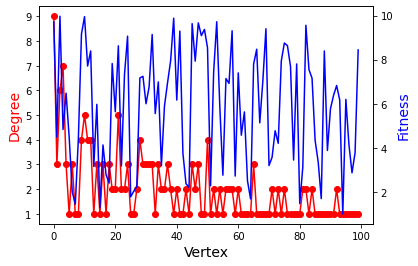

In [5]:
G = t_party(100)
degree_sequence = [d for n, d in G.degree()]
fitness = [x[1]['fitness'] for x in G.nodes().data()]

r, p = pearsonr(fitness, degree_sequence)
print(f"Fitness and degree have a Pearson correlation coefficient of {r} with p-value {p}")

fig,ax=plt.subplots()
ax.plot(range(len(G.nodes())),degree_sequence, marker="o", color="red" )
ax.set_xlabel("Vertex", fontsize = 14)
ax.set_ylabel("Degree", color = "red", fontsize = 14)

ax2=ax.twinx()
ax2.plot(range(len(G.nodes())), fitness, color = "blue")
ax2.set_ylabel("Fitness", color = "blue", fontsize = 14)
plt.show()

- If half of the nodes have $\eta = 2$, and the other half $\eta = 1$, what is the degree distribution of the network after a sufficiently long time?

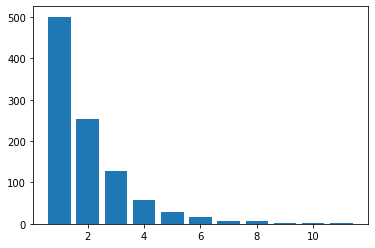

In [10]:
def plot_dd(G):
    degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
    plt.bar(*np.unique(degree_sequence, return_counts=True))
    plt.show()

half_G = t_party(1000)
plot_dd(half_G)